11490434/11490434 [==============================] - 0s 0us/step


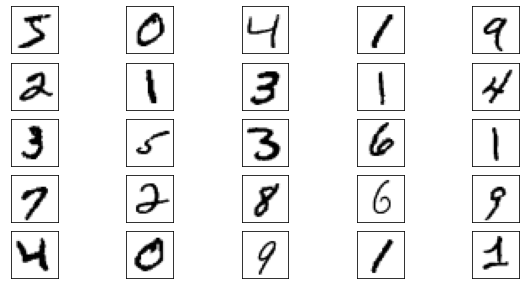

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2886 - accuracy: 0.9182 - val_loss: 0.1549 - val_accuracy: 0.9564
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1282 - accuracy: 0.9620 - val_loss: 0.1280 - val_accuracy: 0.9603
Epoch 3/10
1500/1500 

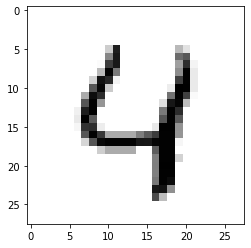

313/313 [==============================] - 1s 2ms/step
(10000,)
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[ True  True  True  True  True  True  True  True  True  True]
(240, 28, 28)


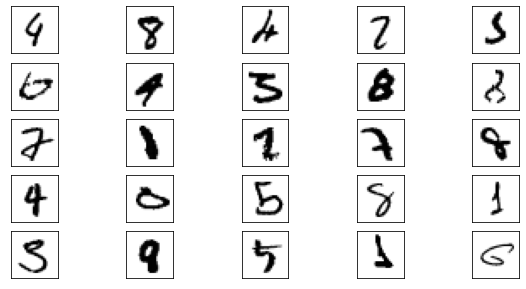

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

(x_train, y_train), (x_test, y_test) = mnist.load_data()  # загрузка данных

# стандартизация входных данных
x_train = x_train / 255  # 255 черный
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10)  # создаются векторы 
y_test_cat = keras.utils.to_categorical(y_test, 10)

# отображение первых 25 изображений из обучающей выборки
plt.figure(figsize=(10,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()

model = keras.Sequential([   #модель
    Flatten(input_shape=(28, 28, 1)),   # 1 байт - 1 пикс
    Dense(128, activation='relu'),  # нейроны в скрытом слое, фун-ия акт-ии
    Dense(10, activation='softmax')  # нейроны в выходном слое, фун-ия акт-ии
])

print(model.summary())      # вывод структуры НС в консоль

model.compile(optimizer='adam',  # компиляция 
             loss='categorical_crossentropy',
             metrics=['accuracy'])


model.fit(x_train, y_train_cat, batch_size=32, epochs=10, validation_split=0.2)  # запуск процесса обучения

model.evaluate(x_test, y_test_cat)  

n = 4  # индекс
x = np.expand_dims(x_test[n], axis=0)  # трехмерный тензор
res = model.predict(x)
print( res )
print( f"Распознанная цифра: {np.argmax(res)}" )  # индекс максм значения, та будет цифра

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

# Распознавание всей тестовой выборки
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:20])
print(y_test[:20])

# Выделение неверных вариантов
mask = pred == y_test
print(mask[:10])

x_false = x_test[~mask]
y_false = x_test[~mask]

print(x_false.shape)

# Вывод первых 25 неверных результатов
plt.figure(figsize=(10,5))
for i in range(25):
    # print("Значение сети: "+str(x_false[i]))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_false[i], cmap=plt.cm.binary)

plt.show()